
# Fast F1 and Formula 1 Plotting Basics

## Setup

In [1]:
# Setup
import fastf1
from fastf1 import plotting
from fastf1 import utils

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection

import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', module="matplotlib\..*")

In [2]:
# Enable Caching
fastf1.Cache.enable_cache('../cache')


## 2 Driver Telemetry


In [3]:
# Select Drivers and Session
driver_1, driver_2 = 'VER', 'LEC'
year, grand_prix, session = 2022, 'Bahrain', 'R'

In [4]:
# Setup fastf1 plotting
plotting.setup_mpl()

# Load session
selected_session = fastf1.get_session(year, grand_prix, session)
selected_session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


In [5]:
# Select Hamilton, Verstappen, and Leclerc
# laps_ham = selected_session.laps.pick_driver('HAM')
# laps_ver = selected_session.laps.pick_driver('VER')
# laps_lec = selected_session.laps.pick_driver('LEC')



In [6]:
laps_driver_1 = selected_session.laps.pick_driver(driver_1)
laps_driver_2 = selected_session.laps.pick_driver(driver_2)

quicklaps_driver_1 = selected_session.laps.pick_driver(driver_1).pick_quicklaps()
quicklaps_driver_2 = selected_session.laps.pick_driver(driver_2).pick_quicklaps()

# # Select Fastest Laps
# fastest_ham = laps_ham.pick_fastest()
# fastest_ver = laps_ver.pick_fastest()
# fastest_lec = laps_lec.pick_fastest()
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# # Select driver team for color purposes
# team_ham = fastest_ham['Team']
# team_ver = fastest_ver['Team']
# team_lec = fastest_lec['Team']
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

# Retrieve telemetry with distance
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

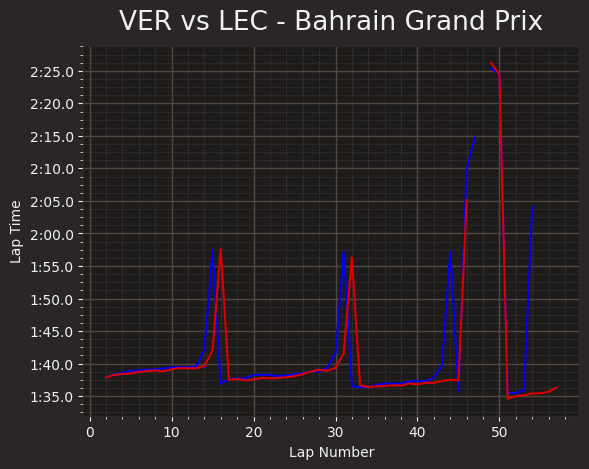

In [7]:
# Lap times throughout session
fig, ax = plt.subplots()
ax.plot(laps_driver_1['LapNumber'], laps_driver_1['LapTime'], color=fastf1.plotting.team_color(team_driver_1))
ax.plot(laps_driver_2['LapNumber'], laps_driver_2['LapTime'], color=fastf1.plotting.team_color(team_driver_2))
ax.set_title(f"{driver_1} vs {driver_2} - Bahrain Grand Prix")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.show()

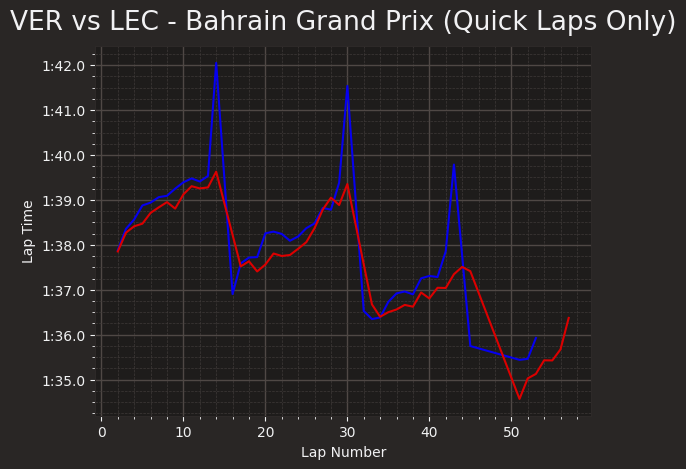

In [8]:
# Lap times throughout session
fig, ax = plt.subplots()
ax.plot(quicklaps_driver_1['LapNumber'], quicklaps_driver_1['LapTime'], color=fastf1.plotting.team_color(team_driver_1))
ax.plot(quicklaps_driver_2['LapNumber'], quicklaps_driver_2['LapTime'], color=fastf1.plotting.team_color(team_driver_2))
ax.set_title(f"{driver_1} vs {driver_2} - Bahrain Grand Prix (Quick Laps Only)")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.show()

In [9]:
# Find delta time between 2 drivers
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

In [10]:
# Set plot params
plot_size = [15,15]
plot_title = f"{selected_session.event.year} {selected_session.event.EventName} - {selected_session.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

In [11]:
# DRS data comes in dirty, set value 8 to 0 and anything > 8 to 1
telemetry_driver_1.loc[telemetry_driver_1['DRS'] == 8, 'DRS'] = 0
telemetry_driver_1.loc[telemetry_driver_1['DRS'] > 8, 'DRS'] = 1

telemetry_driver_2.loc[telemetry_driver_2['DRS'] == 8, 'DRS'] = 0
telemetry_driver_2.loc[telemetry_driver_2['DRS'] > 8, 'DRS'] = 1

In [12]:
# I am an American, so convert kmph to mph
kmph2mph_const = 0.621371192
telemetry_driver_1['Speed'] = (telemetry_driver_1['Speed'] * kmph2mph_const).round(3)
telemetry_driver_2['Speed'] = (telemetry_driver_2['Speed'] * kmph2mph_const).round(3)

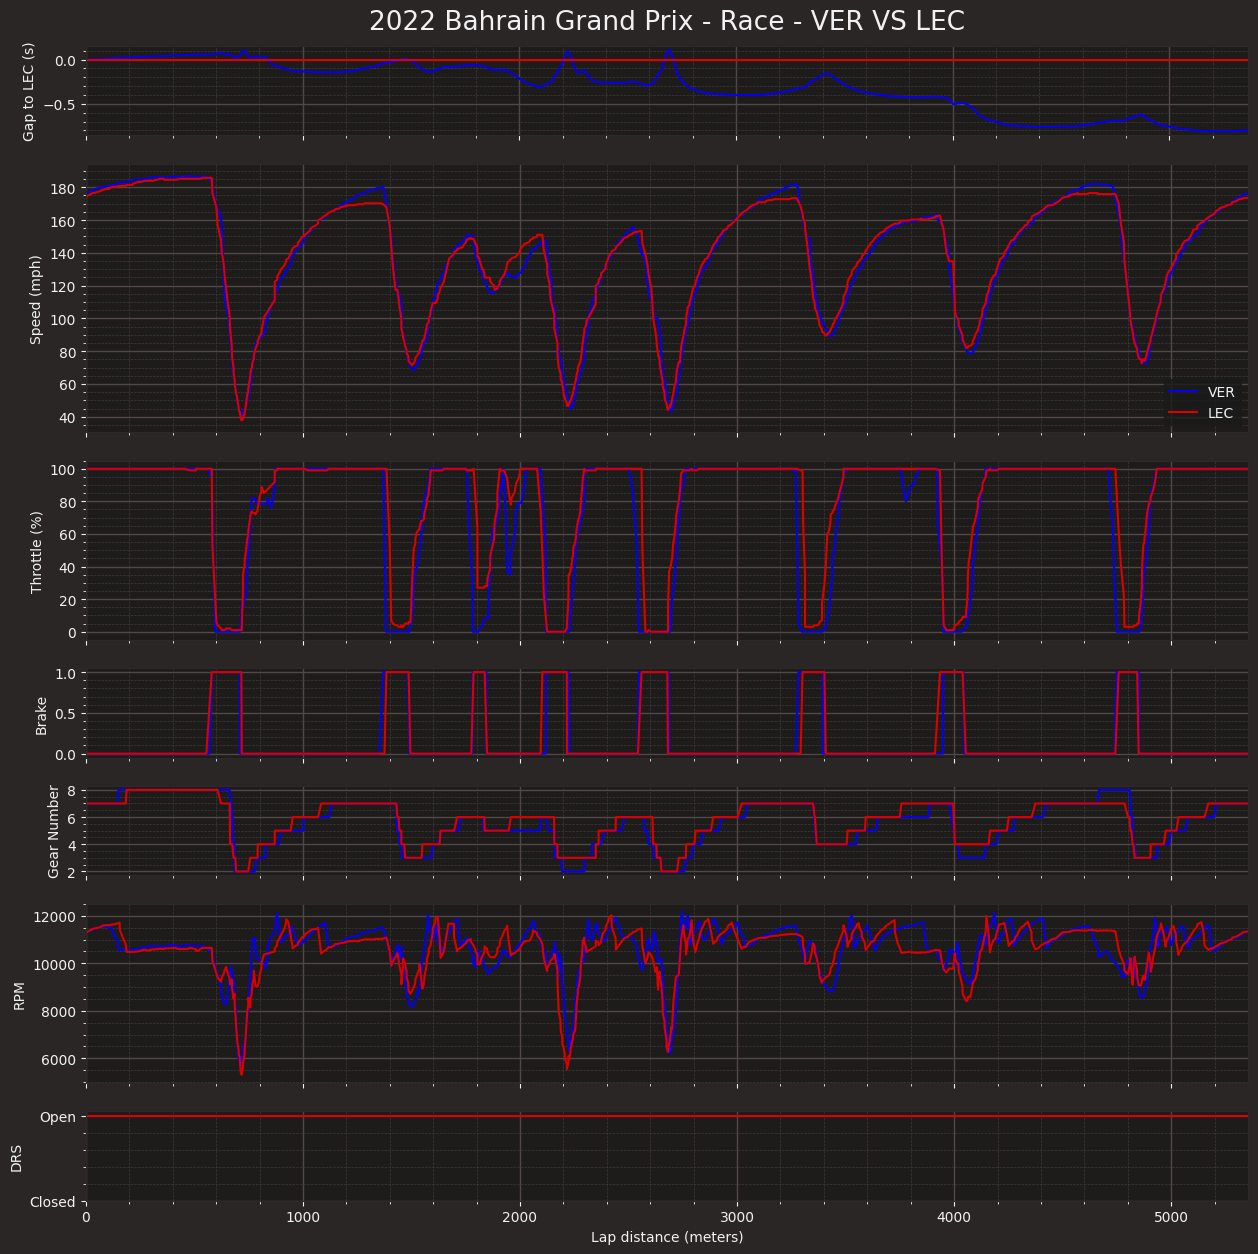

In [13]:
# Set plot size
plt.rcParams['figure.figsize'] = plot_size

# Create subplots and set sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios},)

# Plot title
ax[0].set_title(plot_title)

# Delta line
ax[0].plot(ref_tel['Distance'], delta_time, color=fastf1.plotting.team_color(team_driver_1))
ax[0].axhline(0, color = fastf1.plotting.team_color(team_driver_2))
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed (mph)')
ax[1].legend(loc="lower right")

# Throttle
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle (%)')

# Brake
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[4].set(yticks=[2,4,6,8])
ax[4].set(ylabel='Gear Number')

# RPM
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(yticks=[0,1],yticklabels=['Closed','Open'])
ax[6].set(xlabel='Lap distance (meters)' )

# Remove x labels and tick labels for top plots and y ticks for right plots, set x margins to 0
for a in ax.flat:
    a.label_outer()
    a.margins(x=0)

# Store figure
plt.savefig('Telemetry-PNGS/' + plot_filename, dpi=300)
plt.show()

In [14]:
telemetry_driver_1['DRS'].unique()

array([1], dtype=int64)


## Fastest mini-sector by driver


In [15]:
# # Remove formation lap from lap number
# laps_driver_1['RaceLapNumber'] = laps_driver_1['LapNumber'] - 1
# laps_driver_2['RaceLapNumber'] = laps_driver_2['LapNumber'] - 1



In [16]:
# Prepare data for plotting
x_driver_1 = np.array(telemetry_driver_1['X'].values)
y_driver_1 = np.array(telemetry_driver_1['Y'].values)

points = np.array([x_driver_1,y_driver_1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = telemetry_driver_1['nGear'].to_numpy().astype(float)

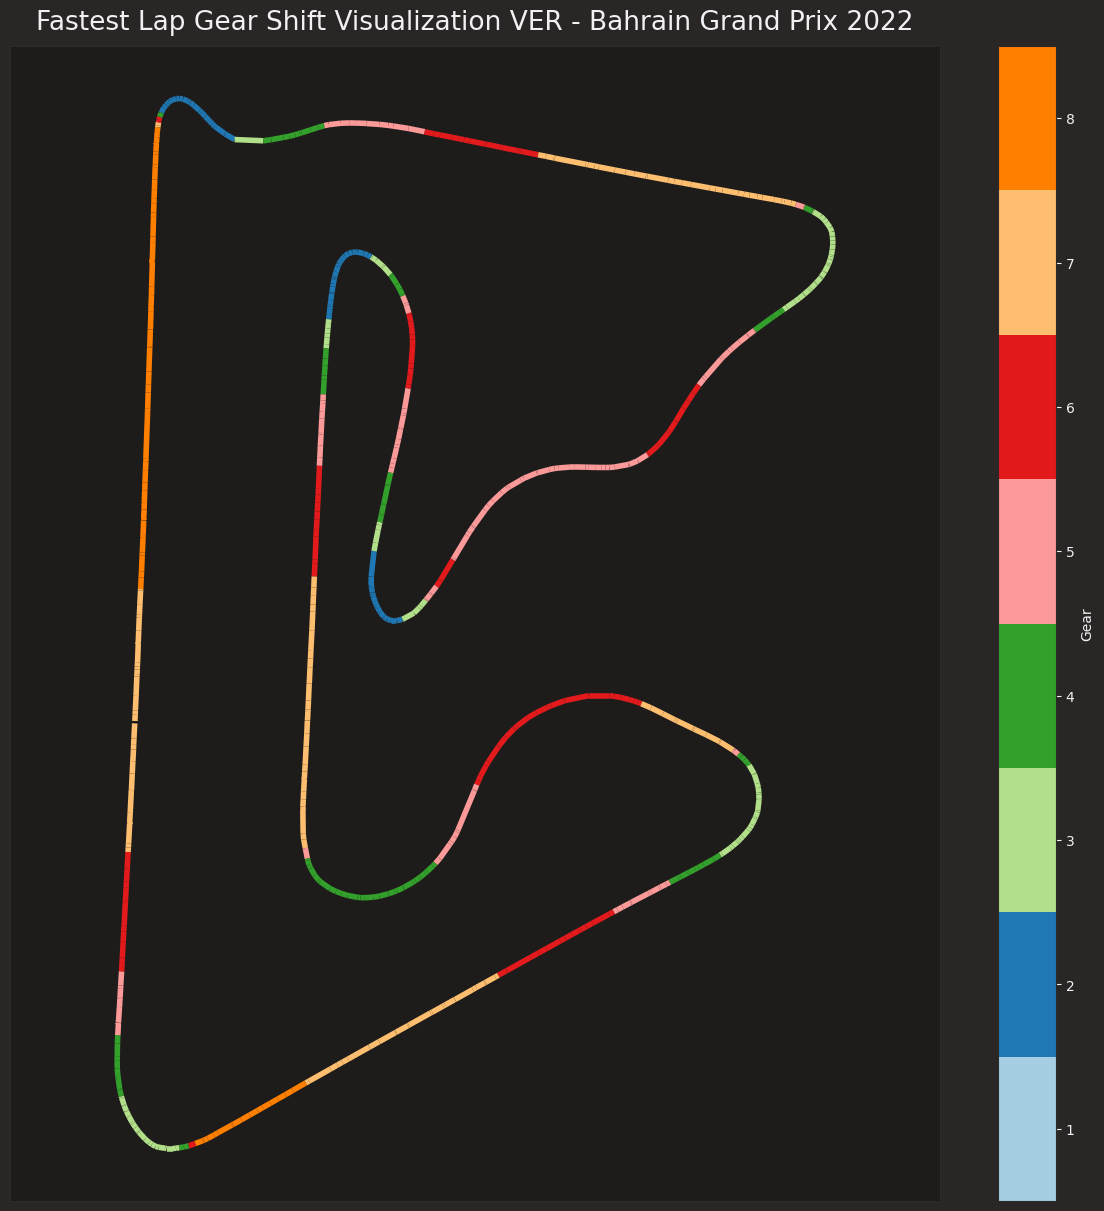

In [17]:
# Create line collection and normalize values to integers for colormap
cmap = mpl.colormaps.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

# Create plot and add title
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
plot_title = f"Fastest Lap Gear Shift Visualization" + f" {driver_1} - {selected_session.event['EventName']} {selected_session.event.year}"
plt.title(plot_title)

# Add colorbar
cbar = plt.colorbar( mappable=lc_comp, label="Gear", boundaries=np.arange(1,10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

# Store figure
plot_filename = plot_title.replace(" ", "") + ".png"
plt.savefig('Telemetry-PNGS/' + plot_filename, dpi=300)

# Show plot
plt.show()


## TESTING - REMOVE

In [44]:
# Load the session data
race = fastf1.get_session(2021, 'Russia', 'R')

# Get the laps
laps = race.load_laps(with_telemetry=True)

core           INFO 	Loading data for Russian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '55', '3', '77', '14', '4', '7', '11', '63', '18', '5', '10', '31', '16', '99', '22', '9', '6', '47']


In [45]:
# Calculate RaceLapNumber (LapNumber minus 1 since the warmup lap is included in LapNumber)
laps['RaceLapNumber'] = laps['LapNumber'] - 1

# Starting from lap 45 it started raining
laps = laps.loc[laps['RaceLapNumber'] >= 45]

In [46]:
# Get all drivers
drivers = pd.unique(laps['Driver'])

telemetry = pd.DataFrame()

# Telemetry can only be retrieved driver-by-driver
for driver in drivers:
    driver_laps = laps.pick_driver(driver)
    
    # Since we want to compare distances, we need to collect telemetry lap-by-lap to reset the distance
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RaceLapNumber']
        driver_telemetry['Compound'] = lap[1]['Compound']
    
        telemetry = telemetry.append(driver_telemetry)

In [47]:
# Only keep required columns
telemetry = telemetry[['Lap', 'Distance', 'Compound', 'Speed', 'X','Y']]

# Everything that's not intermediate will be "slick"
telemetry['Compound'].loc[telemetry['Compound'] != 'INTERMEDIATE'] = 'SLICK'

In [48]:
# We want 25 mini-sectors
num_minisectors = 25

# What is the total distance of a lap?
total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [49]:
# Assign minisector to every row in the telemetry data
telemetry['Minisector'] =  telemetry['Distance'].apply(
  lambda z: (
    minisectors.index(
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)

In [50]:
# Calculate fastest tyre per mini sector
average_speed = telemetry.groupby(['Lap', 'Minisector', 'Compound'])['Speed'].mean().reset_index()

In [51]:
# Select the compound with the highest average speed
fastest_compounds = average_speed.loc[average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the Compound column
fastest_compounds = fastest_compounds[['Lap', 'Minisector', 'Compound']].rename(columns={'Compound': 'Fastest_compound'})

In [52]:
fastest_compounds

,Lap,Minisector,Fastest_compound
0,45,1,SLICK
1,45,2,SLICK
2,45,3,SLICK
3,45,4,SLICK
4,45,5,SLICK
...,...,...,...
320,52,21,INTERMEDIATE
321,52,22,INTERMEDIATE
322,52,23,INTERMEDIATE
323,52,24,INTERMEDIATE


In [53]:
# Join the fastest compound per minisector with the full telemetry
telemetry = telemetry.merge(fastest_compounds, on=['Lap', 'Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Assign integer value to the compound because that's what matplotlib wants
telemetry.loc[telemetry['Fastest_compound'] == "INTERMEDIATE", 'Fastest_compound_int'] = 1
telemetry.loc[telemetry['Fastest_compound'] == "SLICK", 'Fastest_compound_int'] = 2

In [54]:
telemetry

,Lap,Distance,Compound,Speed,X,Y,Minisector,Fastest_compound,Fastest_compound_int
0,45,0.000000,SLICK,178,1281,-416,1,SLICK,2.0
96359,50,0.000000,INTERMEDIATE,165,1281,-413,1,SLICK,2.0
96341,50,0.000000,INTERMEDIATE,162,1288,-405,1,SLICK,2.0
96238,50,0.000000,INTERMEDIATE,59,1154,-250,1,SLICK,2.0
96218,50,0.000000,INTERMEDIATE,156,1291,-401,1,SLICK,2.0
...,...,...,...,...,...,...,...,...,...
116477,50,5841.785278,SLICK,60,1203,-173,25,INTERMEDIATE,1.0
116478,50,5845.385278,SLICK,60,1180,-210,25,INTERMEDIATE,1.0
116479,50,5845.785278,SLICK,60,1177,-214,25,INTERMEDIATE,1.0
116480,50,5849.051944,SLICK,60,1154,-252,25,INTERMEDIATE,1.0


In [28]:
single_lap = telemetry.loc[telemetry['Lap'] == 45]

In [29]:
def generate_minisector_plot(lap, save=False, details=True):
    single_lap = telemetry.loc[telemetry['Lap'] == lap]

    x = np.array(single_lap['X'].values)
    y = np.array(single_lap['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    compound = single_lap['Fastest_compound_int'].to_numpy().astype(float)

    cmap = mpl.colormaps.get_cmap('Paired')
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(compound)
    lc_comp.set_linewidth(2)

    plt.rcParams['figure.figsize'] = [12, 5]
    
    if details:
        title = plt.suptitle(
            f"2021 Russian GP \n Lap {lap} - Slicks vs. Inters"
        )
        
    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
    if details:
        cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
        cbar.set_ticks(np.arange(1.5, 3.5))
        cbar.set_ticklabels(['Inters', 'Slicks'])
    
    if save:
        plt.savefig(f"Telemetry-PNGS/minisectors_lap_{lap}.png", dpi=300)

    plt.show()

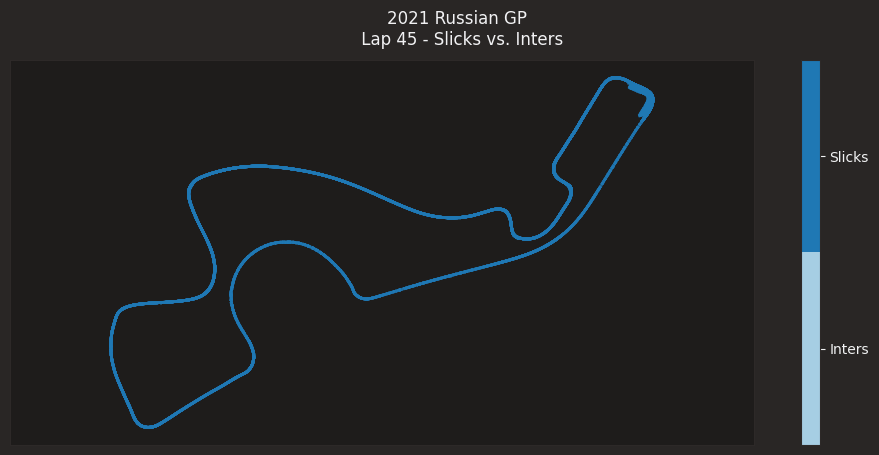

In [30]:

generate_minisector_plot(45, save=True, details=True)


## END OF TESTING

In [103]:
telemetry = pd.DataFrame()

telemetry_driver_1['Driver'] = driver_1
telemetry_driver_2['Driver'] = driver_2

telemetry = telemetry.append(telemetry_driver_1)
telemetry = telemetry.append(telemetry_driver_2)

In [104]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2022-03-20 16:30:01.985,0 days 02:29:01.968000,,67.190833,0 days 00:00:00,11306,175.848,7,100,False,1,interpolation,0.000017,OnTrack,-377,1322,-158,0.000000,VER
3,2022-03-20 16:30:02.000,0 days 02:29:01.983000,,67.190833,0 days 00:00:00.015000,11309,176.469,7,100,False,1,pos,0.000237,OnTrack,-377,1333,-159,1.183333,VER
4,2022-03-20 16:30:02.083,0 days 02:29:02.066000,,67.190833,0 days 00:00:00.098000,11315,177.091,7,100,False,1,car,0.001456,OnTrack,-374,1394,-159,7.754167,VER
5,2022-03-20 16:30:02.140,0 days 02:29:02.123000,,67.190833,0 days 00:00:00.155000,11355,177.091,7,100,False,1,pos,0.002294,OnTrack,-372,1444,-159,12.266667,VER
6,2022-03-20 16:30:02.283,0 days 02:29:02.266000,16,67.190833,0 days 00:00:00.298000,11396,177.712,7,100,False,1,car,0.004399,OnTrack,-364,1607,-158,23.627222,VER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2022-03-20 16:31:35.243,0 days 02:30:35.226000,,NaN,0 days 00:01:34.106000,11200,172.741,7,100,False,1,car,0.993048,OnTrack,-396,953,-159,5315.165278,LEC
704,2022-03-20 16:31:35.361,0 days 02:30:35.344000,,NaN,0 days 00:01:34.224000,11257,172.741,7,100,False,1,pos,0.994752,OnTrack,-389,1088,-159,5324.277500,LEC
705,2022-03-20 16:31:35.483,0 days 02:30:35.466000,,NaN,0 days 00:01:34.346000,11314,173.363,7,100,False,1,car,0.996518,OnTrack,-385,1159,-158,5333.732500,LEC
706,2022-03-20 16:31:35.641,0 days 02:30:35.624000,,NaN,0 days 00:01:34.504000,11326,173.363,7,100,False,1,pos,0.998809,OnTrack,-383,1213,-159,5345.977500,LEC


In [105]:
telemetry = telemetry[['Driver','Distance', 'Speed', 'X', 'Y']]

In [106]:
telemetry

,Driver,Distance,Speed,X,Y
2,VER,0.000000,175.848,-377,1322
3,VER,1.183333,176.469,-377,1333
4,VER,7.754167,177.091,-374,1394
5,VER,12.266667,177.091,-372,1444
6,VER,23.627222,177.712,-364,1607
...,...,...,...,...,...
703,LEC,5315.165278,172.741,-396,953
704,LEC,5324.277500,172.741,-389,1088
705,LEC,5333.732500,173.363,-385,1159
706,LEC,5345.977500,173.363,-383,1213


In [107]:
num_minisectors = 50

total_distance = max(telemetry['Distance'])

minisector_length = total_distance/num_minisectors

minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))


In [108]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda z: (
        minisectors.index( min(minisectors, key=lambda x: abs(x-z))) + 1
    )
)

C:\Users\Samuel\AppData\Local\Temp\ipykernel_17740\1310369616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry['Minisector'] = telemetry['Distance'].apply(


In [109]:
average_speed = telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()

In [110]:
fastest_minisectors = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

fastest_minisectors = fastest_minisectors[['Minisector','Driver']].rename(columns = {'Driver': 'Fastest_driver'})

In [111]:
fastest_minisectors

,Minisector,Fastest_driver
1,1,VER
3,2,VER
5,3,VER
7,4,VER
9,5,VER
11,6,VER
12,7,LEC
14,8,LEC
16,9,LEC
18,10,LEC


In [112]:
telemetry = telemetry.merge(fastest_minisectors, on=['Minisector'])


telemetry = telemetry.sort_values(by=['Distance'])

telemetry.loc[telemetry['Driver'] == driver_1, 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Driver'] == driver_2, 'Fastest_driver_int'] = 2

In [113]:
telemetry

,Driver,Distance,Speed,X,Y,Minisector,Fastest_driver,Fastest_driver_int
0,VER,0.000000,175.848,-377,1322,1,VER,1.0
7,LEC,0.000000,173.984,-372,1305,1,VER,2.0
1,VER,1.183333,176.469,-377,1333,1,VER,1.0
8,LEC,4.917500,174.605,-375,1379,1,VER,2.0
2,VER,7.754167,177.091,-374,1394,1,VER,1.0
...,...,...,...,...,...,...,...,...
1415,LEC,5333.732500,173.363,-385,1159,50,VER,2.0
1399,VER,5338.436667,175.848,-388,1125,50,VER,1.0
1416,LEC,5345.977500,173.363,-383,1213,50,VER,2.0
1417,LEC,5351.092500,173.363,-380,1246,50,VER,2.0


In [114]:
telemetry = telemetry[telemetry['Driver'] == telemetry['Fastest_driver']]

In [115]:
telemetry

,Driver,Distance,Speed,X,Y,Minisector,Fastest_driver,Fastest_driver_int
0,VER,0.000000,175.848,-377,1322,1,VER,1.0
1,VER,1.183333,176.469,-377,1333,1,VER,1.0
2,VER,7.754167,177.091,-374,1394,1,VER,1.0
3,VER,12.266667,177.091,-372,1444,1,VER,1.0
4,VER,23.627222,177.712,-364,1607,1,VER,1.0
...,...,...,...,...,...,...,...,...
1396,VER,5311.674444,173.363,-400,871,50,VER,1.0
1397,VER,5325.880556,174.605,-393,1003,50,VER,1.0
1398,VER,5331.990556,175.227,-391,1063,50,VER,1.0
1399,VER,5338.436667,175.848,-388,1125,50,VER,1.0


In [116]:
def generate_minisector_plot(save=False, details=True):
    # single_lap = telemetry.loc[telemetry['Lap'] == lap]

    x = np.array(telemetry['X'].values)
    y = np.array(telemetry['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    compound = telemetry['Fastest_driver_int'].to_numpy().astype(float)

    cmap = mpl.colormaps.get_cmap('Paired')
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(compound)
    lc_comp.set_linewidth(2)

    plt.rcParams['figure.figsize'] = [12, 5]
    
    if details:
        plot_title = f"Fastest Minisectors Visualization" + f" {driver_1} VS {driver_2} - {selected_session.event['EventName']} {selected_session.event.year}"
        plt.title(plot_title)
        
    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
    if details:
        cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
        cbar.set_ticks(np.arange(1.5, 3.5))
        cbar.set_ticklabels([driver_1, driver_2])
    
    if save:
        plt.savefig(f"Telemetry-PNGS/minisectors_lap.png", dpi=300)

    plt.show()

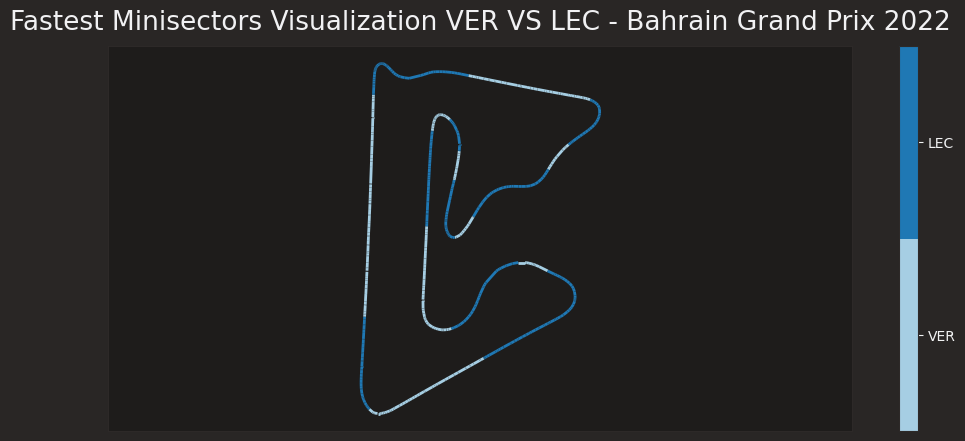

In [117]:
generate_minisector_plot(save=True, details=True)